In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

/home/ricardo/.virtualenvs/land/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

In [3]:
from builder.builder import Builder

In [4]:
plt.style.use("ggplot")

In [5]:
works_info_path = "data/APS/output/aps_works.json"
works_map_path = "data/APS/output/aps_works_map.json"

works = json.load(open(works_info_path))
works_map = json.load(open(works_map_path))
INFO = 1
AUTHORS = 0
CITED_WORKS = 1
grouped_works = Builder.group_by_time(works, resolution="year")
index = []
data = []
columns = ["coauthorship_vertices_count",
           "coauthorship_edges_count",
           "citation_vertices_count",
           "citation_edges_count"]

## counting authors in 2012, for reference

In [ ]:
graph_edges = {}
for ref_date, works_list in grouped_works:
    if True:
        for work_id in works_list:
            authors_list = works[work_id][INFO][AUTHORS]
            i = 0
            for v_i in authors_list:
                if len(authors_list) > 1:
                    for v_j in authors_list[i+1:]:
                        if v_i < v_j:
                            if (v_i, v_j) not in graph_edges:
                                graph_edges[(v_i, v_j)] = 0
                            graph_edges[(v_i, v_j)] += 1
                        else:
                            if (v_j, v_i) not in graph_edges:
                                graph_edges[(v_j, v_i)] = 0
                            graph_edges[(v_j, v_i)] += 1
                    i+=1
                else:
                    graph_edges[(v_i, v_i)] = True

In [39]:
len(authors_2012.keys()) # 2013

11318678

In [37]:
len(authors_2012.keys()) # 2012

11891990

In [41]:
len(authors_2012.keys()) # 2011

10869004

In [34]:
len(authors_2012.keys()) # 1893

12

In [6]:
works[257429]

[u'1997-05-19',
 [[91873, 95687, 50691, 63493, 17765],
  [108368, 177538, 226666, 213713, 200437, 205126, 248285, 218601]]]

In [24]:
for k, v in works_map.iteritems():
    if v == 226666:
        print k

10.1103/PhysRevLett.74.294


In [6]:
authors_map = json.load(open("data/APS/output/aps_authors_map.json"))

In [6]:
authors = {}
for ref_date, works_list in grouped_works:
    for work_id in works_list:
        authors_list = works[work_id][INFO][AUTHORS]
        for v_i in authors_list:
            if v_i not in authors:
                authors[v_i] = 0
            authors[v_i] += 1
        #            for k, v in works_map.iteritems():
#                if v==work_id:
#                    print k, v
#             for author_id in authors_list:
#                 if author_id not in authors:
#                     authors[author_id] = {}
#                 for coauthor in authors_list:
#                     authors[author_id][coauthor] = 1
# for k, v in authors.iteritems():
#     authors[k] = len(v)

In [8]:
for k, v in authors.iteritems():
    if v > 900:
        for k1, v1 in authors_map.iteritems():
            if k == v1:
                print k1, v1

M. S. Alam 252204
D. N. Brown 257429


In [20]:
coauthors_count = {}
for ref_date, works_list in grouped_works:
    for work_id in works_list:
        authors_count = len(works[work_id][INFO][AUTHORS])
        if authors_count == 0:
            print work_id
        if authors_count not in coauthors_count:
            coauthors_count[authors_count] = 0
        coauthors_count[authors_count] += 1

415388
437573


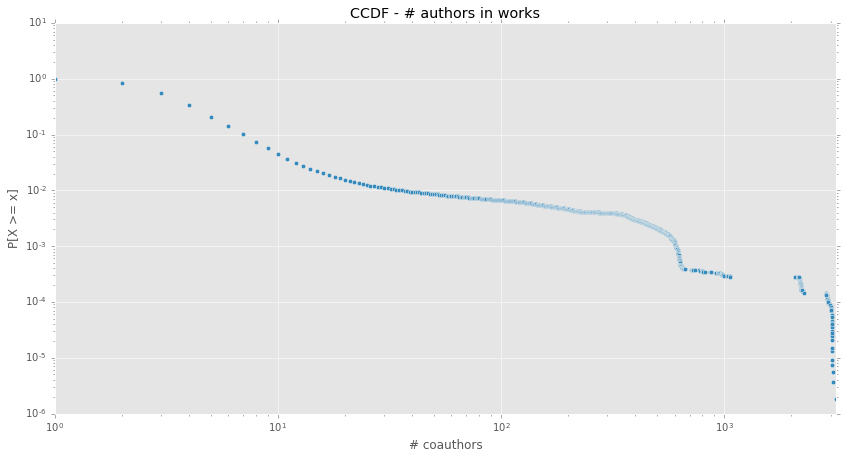

In [26]:
ccdf = ccdf_from_pdf(coauthors_count)
df_data = []
for x, y in ccdf.iteritems():
    df_data.append([x, y])
ccdf_df = pd.DataFrame(data=df_data)
ax = ccdf_df.plot.scatter(x=0, y=1, figsize=(14, 7), xlim=(1, max(ccdf_df[0])), logy=True, logx=True, title="CCDF - # authors in works")
ax.set_xlabel("# coauthors")
ax.set_ylabel("P[X >= x]")

In [11]:
for x, y in pdf.iteritems():
    if x > 1e5:
        print x, y

114996 1
156754 1


In [9]:
df_data2 = []
for k, v in authors.iteritems():
    df_data2.append([k,v])
df2 = pd.DataFrame(data=df_data2, columns=["author", "coauthors_count"])

In [ ]:
authors_list

In [12]:
df2[df2["coauthors_count"] > 100].sort(columns="coauthors_count", ascending=False)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,author,coauthors_count
18761,258151,400
18428,257696,400
18490,257766,400
19488,259389,390
4978,257900,390
18431,257699,373
18435,257704,351
3973,202293,350
14734,217506,315
20554,261185,307


In [8]:
data = []
for k, v in authors.iteritems():
    data.append([v])

df = pd.DataFrame(data=data)

In [34]:
pdf = {}
for x in authors.values():
    if x not in pdf:
        pdf[x] = 0
    pdf[x] += 1

In [39]:
ccdf = ccdf_from_pdf(pdf)

In [40]:
df_data = []
for x, y in ccdf.iteritems():
    df_data.append([x, y])
ccdf_df = pd.DataFrame(data=df_data)

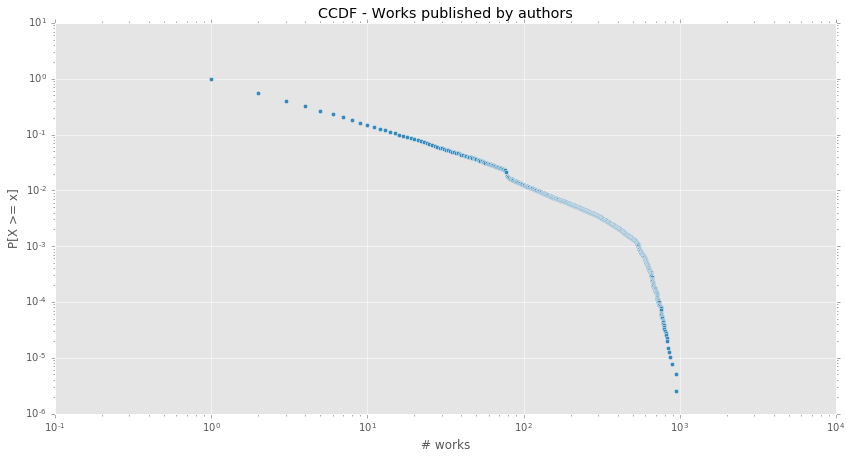

In [56]:
ax = ccdf_df.plot.scatter(x=0, y=1, figsize=(14, 7), logy=True, logx=True, title="CCDF - Works published by authors")
ax.set_xlabel("# works")
ax.set_ylabel("P[X >= x]")

In [9]:
def ccdf_from_pdf(pdf_dict, percent_check=1.0):
    """
    Converts ccdf from pdf
    :param pdf_dict: pdf structured as {1:10}, i.e. 1 happens 10 times
    :returns: ccdf as {1:1.0}, i.e. 100% are greater or equal to 1
    """
    hist = {}
    set_size = sum(pdf_dict.values())
    x_values = map(float, pdf_dict.keys())
    x_values.sort()
    #By definition, first selement will always be (x, 1.0)
    hist[x_values[0]] = 1.0
    #Considering mass of first element
    counted_data = pdf_dict[x_values[0]]
    for x in x_values[1:]:
        hist[x] = float(set_size-counted_data)/set_size
        counted_data += pdf_dict[x]
    return hist

In [6]:
grouped_works[0]

[datetime.datetime(1893, 7, 1, 0, 0),
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]

In [24]:
check_years = {}
for year, works_list in grouped_works:
    for work_id in works_list:
        work = works[work_id]
        if len(work[INFO][AUTHORS]) > 500:
            if year not in check_years:
                check_years[year] = {"works": 0, "coauthors": 0, "cited": 0, "cited_authors": 0}
            check_years[year]["works"] += 1
            check_years[year]["coauthors"] += len(work[INFO][AUTHORS])
            cited = work[INFO][CITED_WORKS]
            check_years[year]["cited"] += len(cited)
            for work_x in cited:
                check_years[year]["cited_authors"] += len(works[work_id][INFO][AUTHORS])
check_years

{datetime.datetime(2001, 1, 1, 0, 0): {'cited': 62,
  'cited_authors': 38893,
  'coauthors': 6277,
  'works': 10},
 datetime.datetime(2002, 1, 2, 0, 0): {'cited': 207,
  'cited_authors': 113362,
  'coauthors': 13175,
  'works': 24},
 datetime.datetime(2003, 1, 2, 0, 0): {'cited': 333,
  'cited_authors': 188966,
  'coauthors': 19442,
  'works': 34},
 datetime.datetime(2004, 1, 5, 0, 0): {'cited': 676,
  'cited_authors': 411529,
  'coauthors': 41582,
  'works': 69},
 datetime.datetime(2005, 1, 3, 0, 0): {'cited': 1052,
  'cited_authors': 648507,
  'coauthors': 71641,
  'works': 117},
 datetime.datetime(2006, 1, 3, 0, 0): {'cited': 1220,
  'cited_authors': 755654,
  'coauthors': 76437,
  'works': 124},
 datetime.datetime(2007, 1, 2, 0, 0): {'cited': 1469,
  'cited_authors': 872936,
  'coauthors': 75061,
  'works': 126},
 datetime.datetime(2008, 1, 2, 0, 0): {'cited': 1629,
  'cited_authors': 919254,
  'coauthors': 83883,
  'works': 148},
 datetime.datetime(2009, 1, 5, 0, 0): {'cited': 129

In [ ]:
for ref_date, works_list in grouped_works:
        co_authors = {}
        cited_authors = {}
        citations_edges_count = 0
        coauthorship_edges_count = 0
        for work_id in works_list:
            authors_list = works[work_id][INFO][AUTHORS]
            for author in authors_list:
                if author not in co_authors:
                    co_authors[author] = 0
                co_authors[author] += 1
            cited_works_list = works[work_id][INFO][CITED_WORKS]
            authors_count = len(authors_list)
            # click
            coauthorship_edges_count += authors_count*(authors_count-1)
            cited_count = 0
            for cited_work_id in cited_works_list:
                cited_authors_list = works[cited_work_id][INFO][AUTHORS]
                cited_count += len(cited_authors_list)
                for cited_author in cited_authors_list:
                    if cited_author not in cited_authors:
                        cited_authors[cited_author] = 0
                    cited_authors[cited_author] += 1
            citations_edges_count += authors_count*cited_count
        coauthorship_vertices_count = len(co_authors.keys())
        citations_vertices_count = len(cited_authors.keys())
        index.append(ref_date)
        data.append([coauthorship_vertices_count,
                     coauthorship_edges_count,
                     citations_vertices_count,
                     citations_edges_count])
    aps_df = pd.DataFrame(data=data, index=index, columns=columns)

In [5]:
try:
    aps_df = pd.read_pickle("aps_df.pickle")
except:
    works_info_path = "data/APS/output/aps_works.json"
    works = json.load(open(works_info_path))
    INFO = 1
    AUTHORS = 0
    CITED_WORKS = 1
    grouped_works = Builder.group_by_time(works, resolution="month")
    index = []
    data = []
    columns = ["coauthorship_vertices_count",
              "coauthorship_edges_count",
              "citation_vertices_count",
              "citation_edges_count"]
    for ref_date, works_list in grouped_works:
        co_authors = {}
        cited_authors = {}
        citations_edges_count = 0
        coauthorship_edges_count = 0
        for work_id in works_list:
            authors_list = works[work_id][INFO][AUTHORS]
            for author in authors_list:
                if author not in co_authors:
                    co_authors[author] = 0
                co_authors[author] += 1
            cited_works_list = works[work_id][INFO][CITED_WORKS]
            authors_count = len(authors_list)
            # click
            coauthorship_edges_count += authors_count*(authors_count-1)
            cited_count = 0
            for cited_work_id in cited_works_list:
                cited_authors_list = works[cited_work_id][INFO][AUTHORS]
                cited_count += len(cited_authors_list)
                for cited_author in cited_authors_list:
                    if cited_author not in cited_authors:
                        cited_authors[cited_author] = 0
                    cited_authors[cited_author] += 1
            citations_edges_count += authors_count*cited_count
        coauthorship_vertices_count = len(co_authors.keys())
        citations_vertices_count = len(cited_authors.keys())
        index.append(ref_date)
        data.append([coauthorship_vertices_count,
                     coauthorship_edges_count,
                     citations_vertices_count,
                     citations_edges_count])
    aps_df = pd.DataFrame(data=data, index=index, columns=columns)
    aps_df["coauthorship_avg_degree"] = 2.*(aps_df["coauthorship_edges_count"])/aps_df["coauthorship_vertices_count"]
    aps_df["citation_avg_degree"] = 2.*(aps_df["citation_edges_count"])/aps_df["citation_vertices_count"]
    aps_df.to_pickle("aps_df.pickle")

In [6]:
df = aps_df.reset_index()

In [7]:
time_index = aps_df.index.to_pydatetime()
years = mpl.dates.YearLocator()   
months = mpl.dates.MonthLocator()  

In [8]:
aps_df

,coauthorship_vertices_count,coauthorship_edges_count,citation_vertices_count,citation_edges_count,coauthorship_avg_degree,citation_avg_degree
1893-07-01 00:00:00,7,4,0,0,1.142857,NaN
1893-09-01 00:00:00,6,8,0,0,2.666667,NaN
1893-11-01 00:00:00,6,4,0,0,1.333333,NaN
1894-01-01 00:00:00,4,2,0,0,1.000000,NaN
1894-03-01 00:00:00,5,0,0,0,0.000000,NaN
1894-05-01 00:00:00,3,2,0,0,1.333333,NaN
1894-07-01 00:00:00,3,2,1,2,1.333333,4.000000
1894-09-01 00:00:00,4,0,0,0,0.000000,NaN
1894-11-01 00:00:00,5,4,0,0,1.600000,NaN
1895-01-01 00:00:00,3,0,0,0,0.000000,NaN


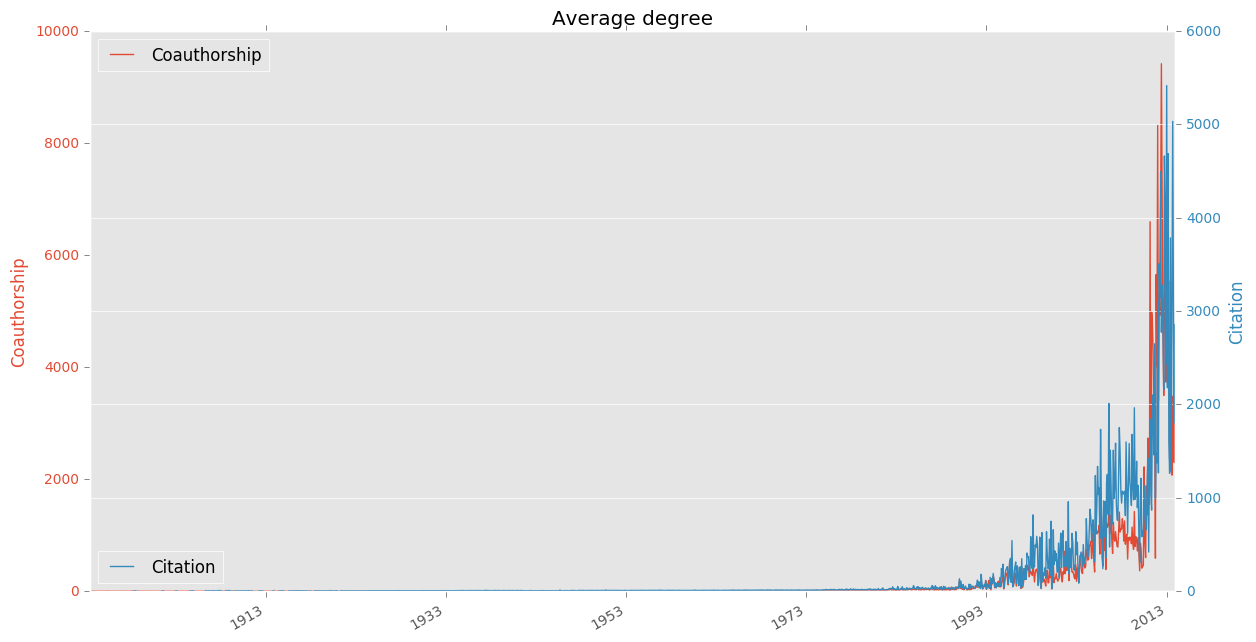

In [46]:
plt.figure(figsize=(14,8))
ax1 = aps_df["coauthorship_avg_degree"].plot(label="Coauthorship")
ax2 = aps_df["citation_avg_degree"].plot(secondary_y=True, label="Citation")
ax1.legend(loc="upper left")
ax2.legend(loc="lower left")

#ax1.set_yscale("log")
ax1_color = ax1.get_lines()[0].get_color()
ax1.set_ylabel("Coauthorship", color=ax1_color)
for tl in ax1.get_yticklabels():
    tl.set_color(ax1_color)

ax2_color = ax2.get_lines()[0].get_color()
ax2.set_ylabel("Citation", color=ax2_color)
for tl in ax2.get_yticklabels():
    tl.set_color(ax2_color)

ax1.set_title("Average degree")
ax1.figure.savefig("average_degree_monthly.eps", format="eps")

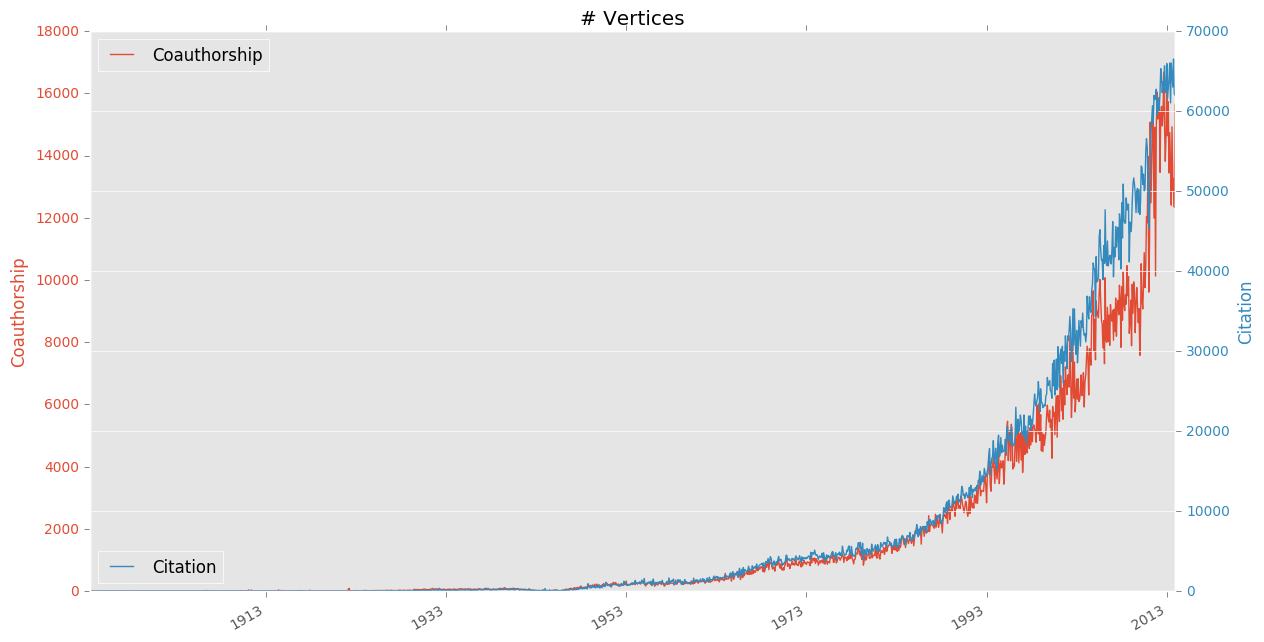

In [45]:
plt.figure(figsize=(14,8))
ax1 = aps_df["coauthorship_vertices_count"].plot(label="Coauthorship")
ax2 = aps_df["citation_vertices_count"].plot(secondary_y=True, label="Citation")
ax1.legend(loc="upper left")
ax2.legend(loc="lower left")

#ax1.set_yscale("log")
ax1_color = ax1.get_lines()[0].get_color()
ax1.set_ylabel("Coauthorship", color=ax1_color)
for tl in ax1.get_yticklabels():
    tl.set_color(ax1_color)

ax2_color = ax2.get_lines()[0].get_color()
ax2.set_ylabel("Citation", color=ax2_color)
for tl in ax2.get_yticklabels():
    tl.set_color(ax2_color)

ax1.set_title("# Vertices")
ax1.figure.savefig("vertices_monthly.eps", format="eps")

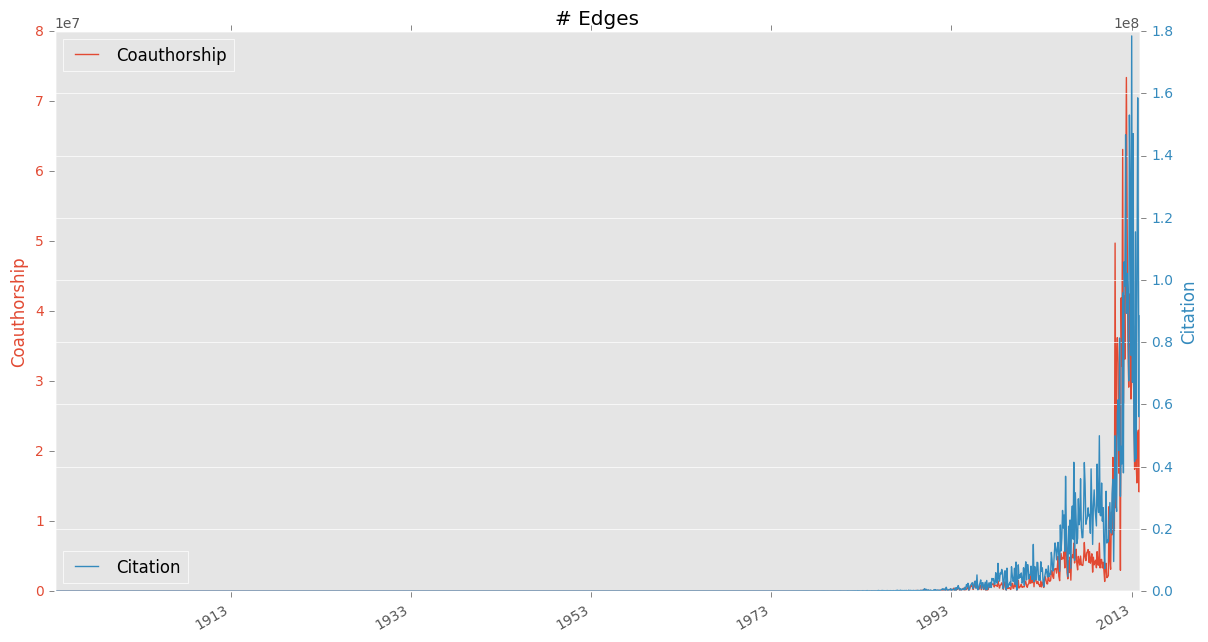

In [44]:
plt.figure(figsize=(14,8))
ax1 = aps_df["coauthorship_edges_count"].plot(label="Coauthorship")
ax2 = aps_df["citation_edges_count"].plot(secondary_y=True, label="Citation")
ax1.legend(loc="upper left")
ax2.legend(loc="lower left")

#ax1.set_yscale("log")
ax1_color = ax1.get_lines()[0].get_color()
ax1.set_ylabel("Coauthorship", color=ax1_color)
for tl in ax1.get_yticklabels():
    tl.set_color(ax1_color)

ax2_color = ax2.get_lines()[0].get_color()
ax2.set_ylabel("Citation", color=ax2_color)
for tl in ax2.get_yticklabels():
    tl.set_color(ax2_color)

ax1.set_title("# Edges")
ax1.figure.savefig("edges_monthly.eps", format="eps")